# Nuclear Instrumentation
## ΔE-E Detector

Karina Chiñas Fuentes

Student Nummer: 02118434

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.constants as spc
import pylab as pl
import seaborn as sns


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

sstyle = "paper"
sns.set_context(sstyle)
sns.set_style("whitegrid")
plt.rc('font',family = 'serif')

qe = spc.elementary_charge # C
mp = spc.proton_mass       # kg
me = spc.electron_mass     # kg
ε0 = spc.epsilon_0         # F/m
c  = spc.speed_of_light    # m/s

**Task:** calcuate the energy loss of a given particle in a $\Delta$E-E detector, using the Bethe-Bloch formula: 

\begin{equation}
    S= \rho\cdot S_m(\beta) = \rho\cdot S_{m,0}\frac{Z_x}{A_x}\left( \frac{Z^2_a}{\beta^2} \right)\left[ Ln\left( \frac{2m_ec^2\beta^2}{<I>}\right) -Ln\left( 1-\beta^2 \right) -\beta^2 \right]
\end{equation}

which express the stopping power in MeV$\cdot$cm$^2\cdot$g$^{-1}$. Where

$$
    S_{m,0} = 4\pi r_e^2 N_A m_e^2 c^2 \approx 0.307 \: \text{MeV}\cdot\text{cm}^2\cdot\text{g}^{-1}
$$

if $A_x$, molar mass of the target nucleus, is expressed in g$\cdot$mol$^{-1}$; with the approximation that, for all elements, $Z_x/A_x\sim$ 0.5. Furthermore, $r_e$ is the classical electron radius

$$
    r_e = \frac{e^2}{4\pi\epsilon_0 m_ec^2} 
$$

And, $m_e$ is the electron mass, $e$ the electron charge, $Z_x$ the atomic number of the absorber atoms, $Z_a$ is the atomic number of the incoming particle, $n_x$ is the number density of the absorber atoms, $\beta = \nu/c$, $\nu$ is the speed of the incoming particle, and $I$ is the average excitation or ionization potential of the absorber atoms. Finally, recall that

$$
    \nu^2 = \frac{2E}{m} \:\: \rightarrow \:\: \beta^2 = \frac{2E}{m_A \cdot 931 \frac{\text{MeV}}{\text{amu}}}
$$

With $m_A$ beng the particle mass in atomic mass units, and $E$ the particle energy in MeV.

**Detector:**  The E detector is made of Ge with energy threshold of 5.2 MeV and thichkness of 11 mm. The $\Delta$E transmission detector is made of Si and its characteristics are _to be determined_ with the knowledge that **deuterons** need to have at least 13.3 MeV to be detected in the $\Delta$E-E detector. And, **protons** cannot be detected with energy above 60 MeV.

**Data:**

* **Silicon**
    * Ionisation potentials: 173 eV
    * Density: 2.32 g/cm$^3$
    * A: 28.0855 g/mol
    * Z: 14
    
* **Germanium**
    * Ionisation potentials: 350 eV
    * Density: 5.3 g/cm$^3$
    * A: 72.59 g/mol
    * Z: 32    

In [2]:
Sm0= 0.307          # Μev*cm2/g 
Si = {
    "I":173e-6,     # ionization potential [MeV]
    "ρ":2.32,       # mass density [g/cm3]
    "A":28.0855,    # atomic mass [g/mol]
    "Z":14,         # atomic number
    "width": None,  # to be determined
    "ET": None,     # to be determined
}
Ge = {
    "I":350e-6,     # ionization potential [MeV]
    "ρ":5.3,        # mass density [g/cm3]
    "A":72.59,      # atomic mass [g/mol]
    "Z":32,         # atomic number
    "width": 1.1,   # cm
    "ET": 5.2,      # energy threshold [MeV]
}
p1n0 = {
    "n":0,
    "Z":1, 
    "Elimit":0.1,   # MeV
}
p1n1 = {
    "n":1,
    "Z":1, 
    "Elimit":0,    # MeV
}
p1n2 = {
    "n":2,
    "Z":1, 
    "Elimit":0,    # MeV
}

In [3]:
element = {
    "Ge":Ge,
    "Si":Si
}
particle = {
    "proton":p1n0,
    "deuterium":p1n1,
    "tritium":p1n2
}

$$
    S = S_m\cdot\rho\cdot\frac{Z_x}{A_x}\left(\frac{Z_\alpha}{\beta}\right)^2\left[ Ln\left(\frac{2m_ec^2\beta^2}{I}\right) - Ln\left(1-\beta^2\right) - \beta^2 \right]
$$

$$
    \beta^2 = {\frac{2E\:[MeV]}{mc^2\:[MeV]}} 
$$

In [88]:
def BB_formula(E, particle_, absorbing_material):
    """
    E: energy of incoming particle in MeV
    particle: proton, deuterium, tritium
    absorbing_material: Ge, Si
    """
    if E > 0:
        n, Za, Elimit = particle[particle_].values()
        I, ρ, Ax, Zx, width, ET = element[absorbing_material].values()

        n += 1
        mecc = (me*c*c/qe)*1e-6   # electron rest mass in MeV
        mαcc = n*(mp*c*c/qe)*1e-6 # incoming particle's rest mass in MeV
        
        β = np.sqrt( 2*E/mαcc )

        S_m = Sm0*(Zx/Ax)*((Za/β)**2)*( np.log( (2*mecc*(β**2))/I) -np.log( 1-β**2) -β**2)
        S = S_m*ρ 

        return S
    else:
        return 0
    
def ΔΕ_compute(E, particle_, absorbing_material, Δx): 
    """
    E: energy of incoming particle in MeV
    particle_: proton, deuterium, tritium
    absorbing_material: Ge, Si
    N: number of grid partitions
    """
    n, Za, Elimit = particle[particle_].values()
    I, ρ, Ax, Zx, width, ET = element[absorbing_material].values()
    
    N = int(width/Δx)
    E_ = E
    for i in range(N):
        E_ -= BB_formula(E_, particle_, absorbing_material)*Δx
    if E_ <= Elimit:
        return 0
    else:
        """if E_ > ET:
            print(f"Energy {round(E_,3)} for {absorbing_material} plate detected")"""
        return E_    

The incoming particles are: **protons**, **deutrons** and **tritons**

Numerical analysis

## Finding the ΔE Thickness

The energy threshold on the Ge detector is 5.2 MeV. Deuterons need to have an energy of at least 13.3 MeV to be detected in the ΔE-E detector system. Therefore, if an incoming Deuteron enters the Si plate, it should leave the plate with at least 8.1 MeV to be detected. Determine the thickness of the ΔE detector with an accuracy of 1 μm. 

In [5]:
Eo = 13.3
δx = 1e-7 # cm  

d  = np.linspace(551e-4, 551.2e-4,10) # micometers to cm 
Ef = np.zeros(len(d))

for i,t in enumerate(d):
    Si["width"] = t
    Ef[i] = ΔΕ_compute(Eo, "deuterium", "Si", δx)

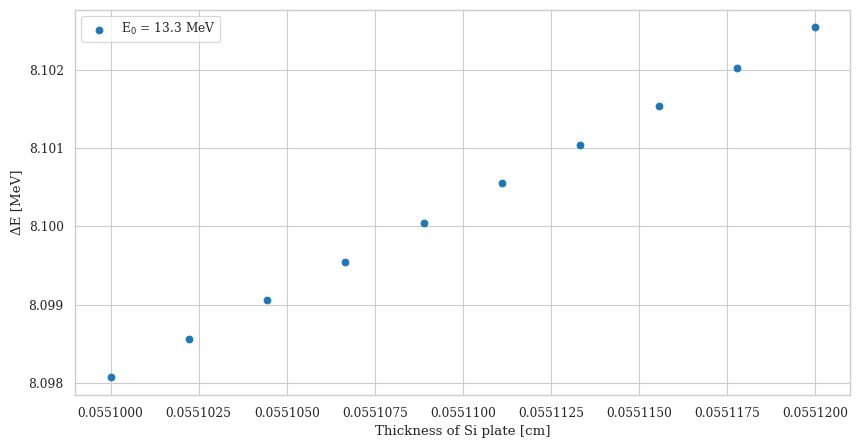

In [6]:
plt.figure(figsize=(10,5))

plt.scatter(d,Eo-Ef, label="E$_0$ = 13.3 MeV")
plt.xlabel("Thickness of Si plate [cm]")
plt.ylabel("ΔΕ [MeV]")
plt.legend();

In [7]:
Si["width"] = 551.1e-4 # cm

## Finding the ΔE Threshold

Protons with an energy above 60 MeV are not detected in the system. In order for the Si plate to detect a particle, the energy deposited $\Delta E$ must exceed the energy threshold. Determine the energy threshold of the ΔE detector.

```python
>>> 60 - ΔΕ_compute(60, "proton", "Si", 1e-9)
    1.0226526903315047
```

In [11]:
Si["ET"] =  round(ET_Si,5) # MeV

## Particle Detection

Make a plot showing the proton, deuterion, and triton energy loss in the ΔE detector as a function of particle energy in steps of 0.1 MeV, or smaller, between 0 and 60 MeV. Based on these plots, explain why a ΔE-E detector system can discriminate between the different particles. 

In [12]:
Eo = np.linspace(0.1,80,150)
Ef = np.zeros(len(Eo)) 

for i,E0 in enumerate(Eo):
    Ef[i] = ΔΕ_compute(E0, "proton", "Si", δx)
ΔE = Eo - Ef    

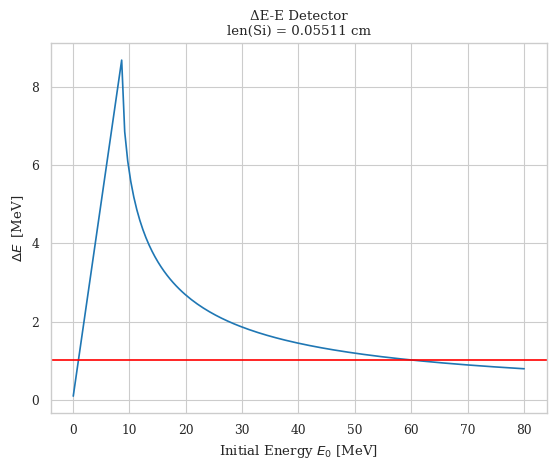

In [13]:
plt.plot(Eo,ΔE)
plt.axhline(ET_Si, c="r")
plt.xlabel("Initial Energy $E_0$ [MeV]")
plt.ylabel("$\\Delta E\\:$ [MeV]")
plt.title(f"ΔΕ Detector - Proton \nlen(Si) = {Si['width']} cm")
if savefigg:
    plt.savefig(f"Figures/DEE_{Si['width']}.png", format="png");

In [39]:
δx = 1e-5 # cm

Eo = np.arange(0,60,0.01)
Efp = np.zeros(len(Eo))
Efd = np.zeros(len(Eo))
Eft = np.zeros(len(Eo)) 

for i, initial_E in enumerate(Eo):
    Efp[i] = ΔΕ_compute(initial_E, "proton", "Si", δx)
    Efd[i] = ΔΕ_compute(initial_E, "deuterium", "Si", δx)
    Eft[i] = ΔΕ_compute(initial_E, "tritium", "Si", δx)
    
ΔEp = Eo - Efp
ΔEd = Eo - Efd
ΔEt = Eo - Eft 

<IPython.core.display.Javascript object>


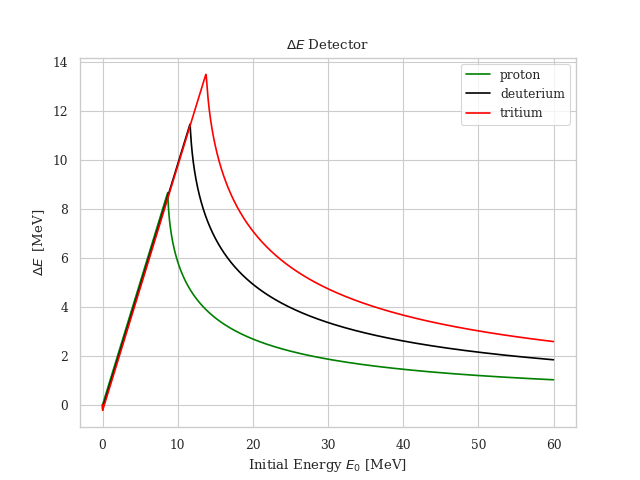

In [40]:
plt.plot(Eo, ΔEp, label=f"{list(particle.keys())[0]}", c="g")
plt.plot(Eo, ΔEd, label=f"{list(particle.keys())[1]}", c="k")
plt.plot(Eo, ΔEt, label=f"{list(particle.keys())[2]}", c="r")
plt.legend()
plt.xlabel("Initial Energy $E_0$ [MeV]")
plt.ylabel("$\\Delta E\\:$ [MeV]")
plt.title("$\\Delta E$ Detector");    

What is the energy of protons that are stopped in the ΔE detector?

In [68]:
print(f"Energy of protons below {max(ΔEp)} MeV are fully stopped in the Si plate.\n" + \
f"Energy of deuterium below {round(max(ΔEd),2)} MeV are fully stopped in the Si plate.\n" + \
f"Energy of tritium below {round(max(ΔEt),2)} MeV are fully stopped in the Si plate.")

Energy of protons below 8.67 MeV are fully stopped in the Si plate.
Energy of deuterium below 11.46 MeV are fully stopped in the Si plate.
Energy of tritium below 13.49 MeV are fully stopped in the Si plate.


In [56]:
vec = ΔEd
max(vec), list(vec).index(max(vec)), Eo[list(vec).index(max(vec))]

(11.457138466328006, 1163, 11.63)

In [57]:
vec = ΔEt
max(vec), list(vec).index(max(vec)), Eo[list(vec).index(max(vec))]

(13.494692885805929, 1375, 13.75)

Determine the low energy threshold of protons and tritions to be determined in the ΔE-E detector.  

In [60]:
# Low energy threshold for proton [MeV]
Eo[np.where(Efp>5.2)[0][0]]

10.57

In [59]:
# Low energy threshold for deuterium [MeV]
Eo[np.where(Efd>5.2)[0][0]]

13.3

In [61]:
# Low energy threshold for tritium [MeV]
Eo[np.where(Eft>5.2)[0][0]]

15.35

## Working the Complete ΔE-E Detector 

In [90]:
δx = 1e-5
NSi, NGe =  int(Si["width"]/δx), int(Ge["width"]/δx)
print(NSi, NGe)

5510 110000


In [91]:
inc_particle = "proton"

Eo = np.linspace(0,100,200) # MeV
Ef = np.zeros(len(Eo)) 

for i,E0 in enumerate(Eo):
    Ef[i] = ΔΕ_compute(E0, inc_particle, "Si", δx)
    Ef[i] = ΔΕ_compute(Ef[i], inc_particle, "Ge", δx)  

<IPython.core.display.Javascript object>


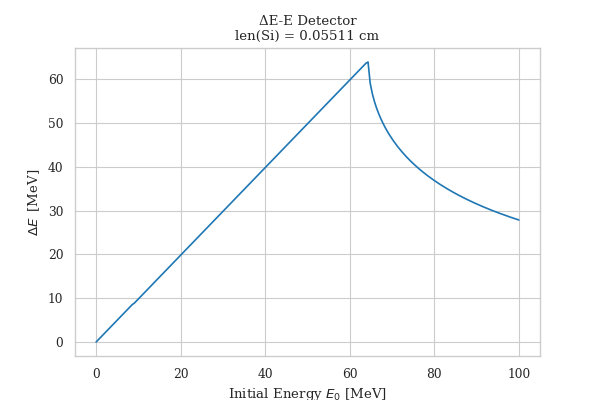

In [92]:
savefigg = False
plt.figure(figsize=(6,4))

ΔE = Eo - Ef
plt.plot(Eo,ΔE)
plt.xlabel("Initial Energy $E_0$ [MeV]")
plt.ylabel("$\\Delta E\\:$ [MeV]")
plt.title(f"ΔΕ-Ε Detector\nlen(Si) = {Si['width']} cm")
if savefigg:
    plt.savefig(f"Figures/DEE_{Si['width']}.png", format="png");  

In [93]:
vec = ΔE
max(vec), list(vec).index(max(vec)), Eo[list(vec).index(max(vec))]

(63.95185401441486, 128, 64.321608040201)

In [96]:
Eo[list(vec).index(max(vec))] - ΔΕ_compute(Eo[list(vec).index(max(vec))] , inc_particle, "Si", δx)

0.9631241203004066

<IPython.core.display.Javascript object>


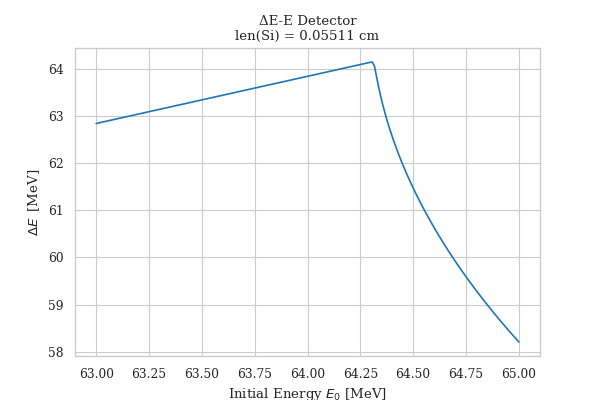

In [99]:
Eo = np.linspace(63,65,200) # MeV
Ef = np.zeros(len(Eo)) 

for i,E0 in enumerate(Eo):
    Ef[i] = ΔΕ_compute(E0, inc_particle, "Si", δx)
    Ef[i] = ΔΕ_compute(Ef[i], inc_particle, "Ge", δx)  
    
savefigg = False
plt.figure(figsize=(6,4))

ΔE = Eo - Ef
plt.plot(Eo,ΔE)
plt.xlabel("Initial Energy $E_0$ [MeV]")
plt.ylabel("$\\Delta E\\:$ [MeV]")
plt.title(f"ΔΕ-Ε Detector\nlen(Si) = {Si['width']} cm")
if savefigg:
    plt.savefig(f"Figures/DEE_{Si['width']}.png", format="png");      

In [100]:
vec = ΔE
max(vec), list(vec).index(max(vec)), Eo[list(vec).index(max(vec))]

(64.1427360966236, 130, 64.30653266331659)

In [101]:
64.3 - ΔΕ_compute(64.3, inc_particle, "Si", δx)

0.9634022752660982